## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

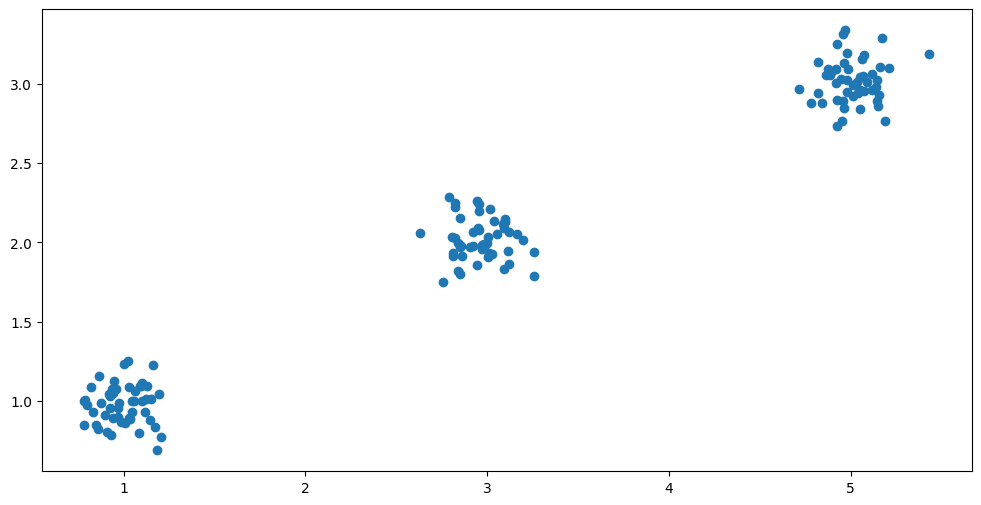

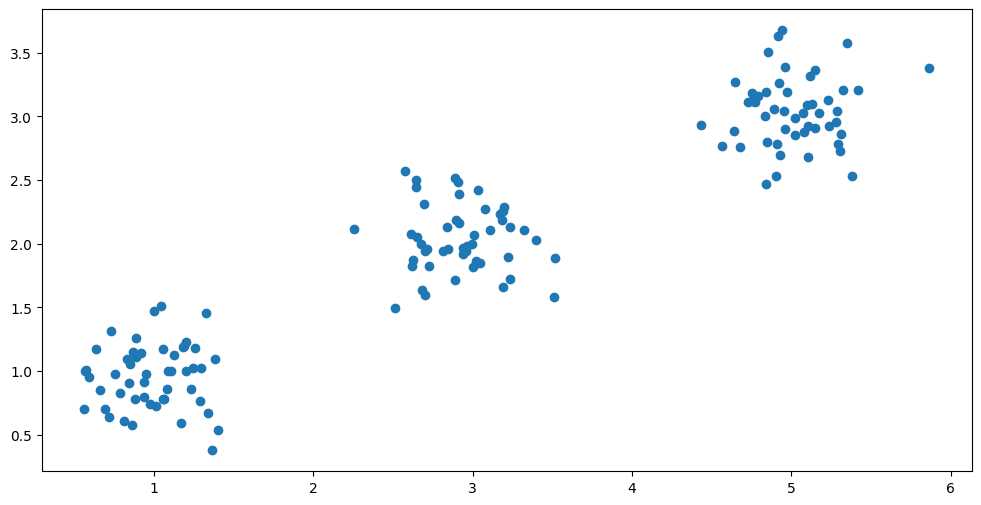

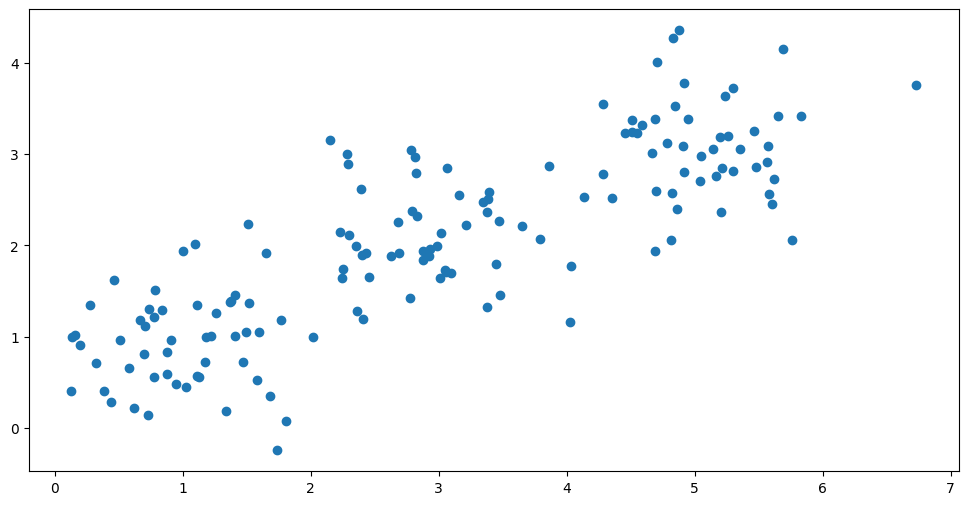

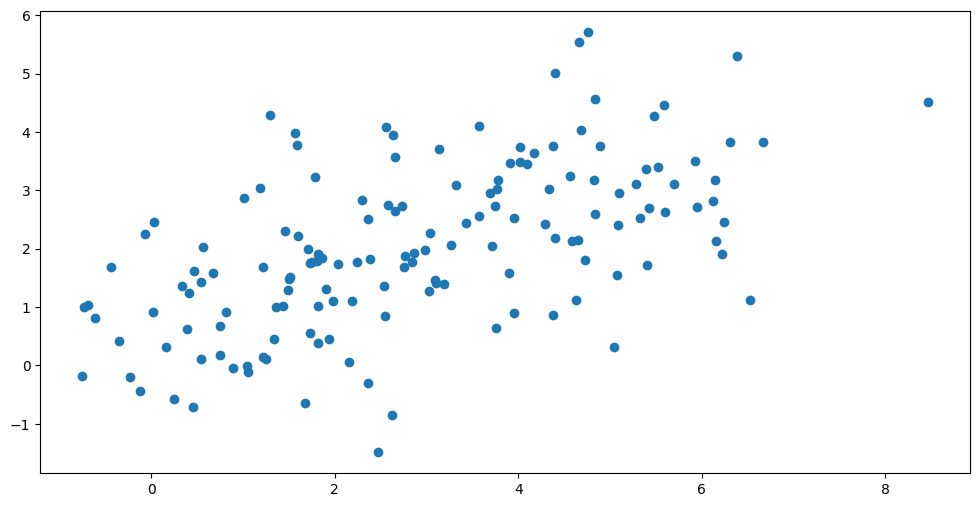

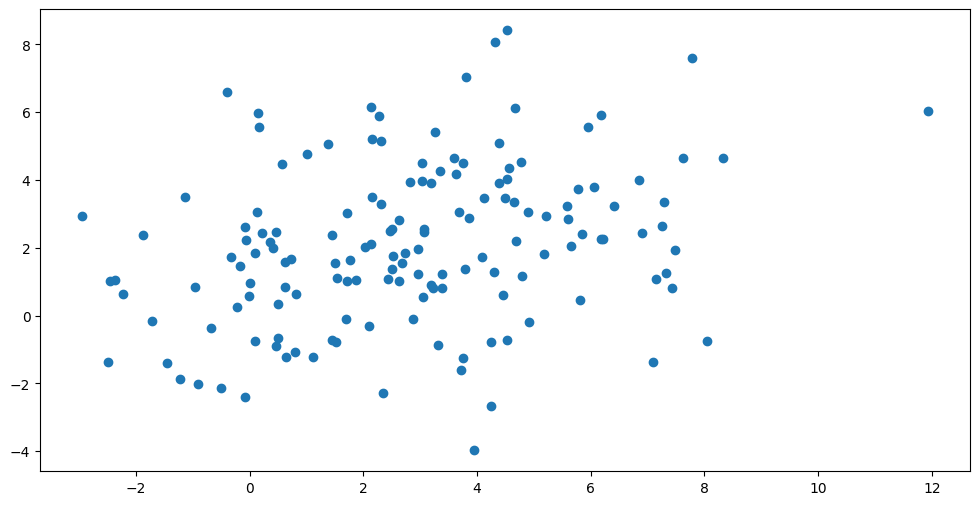

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(x=df0_125['x1'],y=df0_125['x2'])

plt.figure(figsize=(12,6))
plt.scatter(x=df0_25['x1'],y=df0_25['x2'])

plt.figure(figsize=(12,6))
plt.scatter(x=df0_5['x1'],y=df0_5['x2'])

plt.figure(figsize=(12,6))
plt.scatter(x=df1_0['x1'],y=df1_0['x2'])

plt.figure(figsize=(12,6))
plt.scatter(x=df2_0['x1'],y=df2_0['x2'])

At the start when the noise is relatively small it is easy to tell three clusters apart by eyes. Then, as noise increases it gets gradually more difficult and in the two last vizualizations where the noise is 1, repsectively 2, it is impossible to tell the three clusters apart.

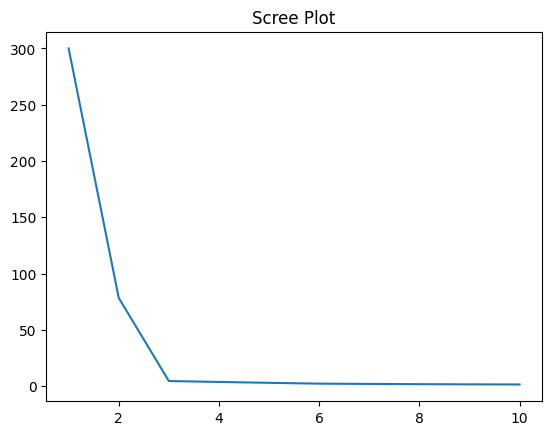

In [22]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler


X = df0_125[['x1', 'x2']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

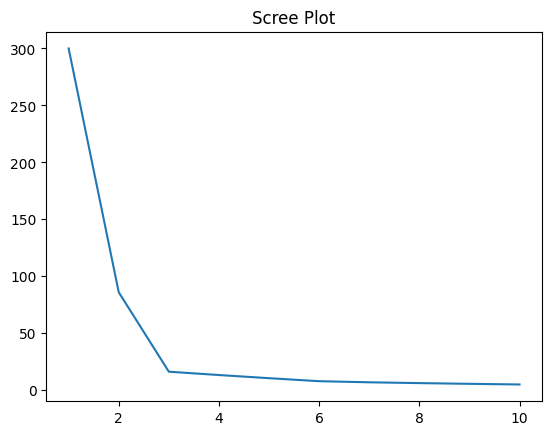

In [27]:
X_1 = df0_25[['x1', 'x2']].values

scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_1_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

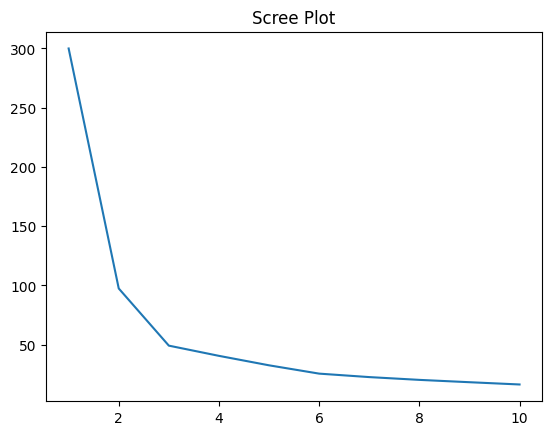

In [28]:
X_2 = df0_5[['x1', 'x2']].values

scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_2_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

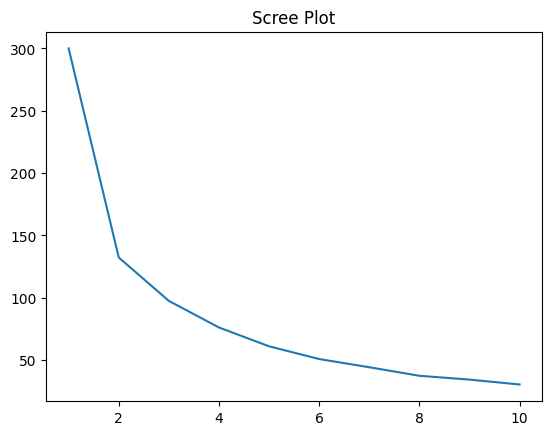

In [29]:
X_3 = df1_0[['x1', 'x2']].values

scaler = StandardScaler()
X_3_scaled = scaler.fit_transform(X_3)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_3_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

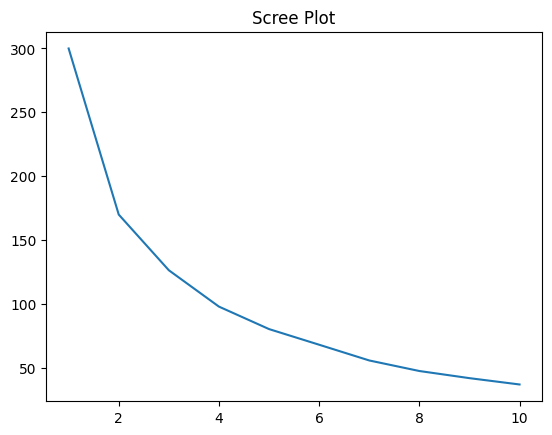

In [30]:
X_4 = df2_0[['x1', 'x2']].values

scaler = StandardScaler()
X_4_scaled = scaler.fit_transform(X_4)

k_bar = 10
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_4_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

The more noise we have the more k's we need!

When there is low noise, there is a clear elbow and therefore it is easy to pick k. When there is a lot fo noise, the elbow isn't clear and therefor it is hard to pick a k.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [16]:
df = pd.read_csv("/content/airbnb_hw.csv")

df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')
df['Review Scores Rating'] = pd.to_numeric(df['Review Scores Rating'], errors='coerce')
df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)
df['Number Of Reviews'] = df['Number Of Reviews'].fillna(0).astype(int)

print(df.head())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews  Price  Review Scores 

<ipython-input-16-3ccaa14d7f9b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)


In [35]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]

for col in columns_to_normalize:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=columns_to_normalize, inplace=True)


scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


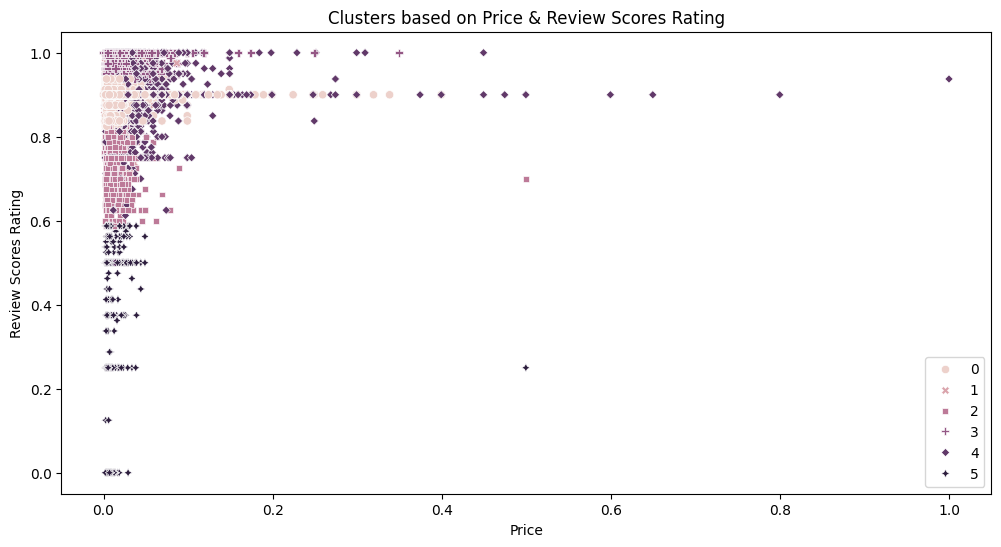

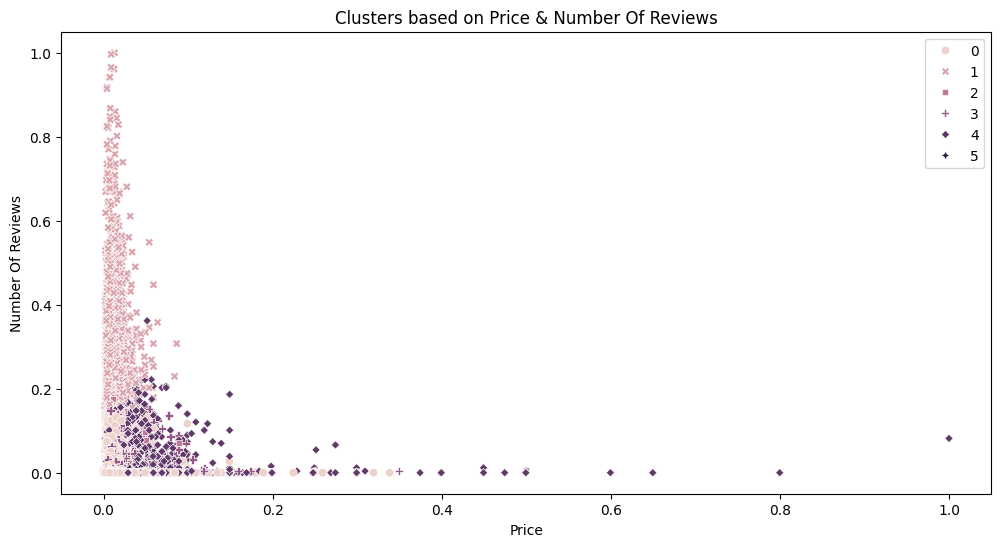

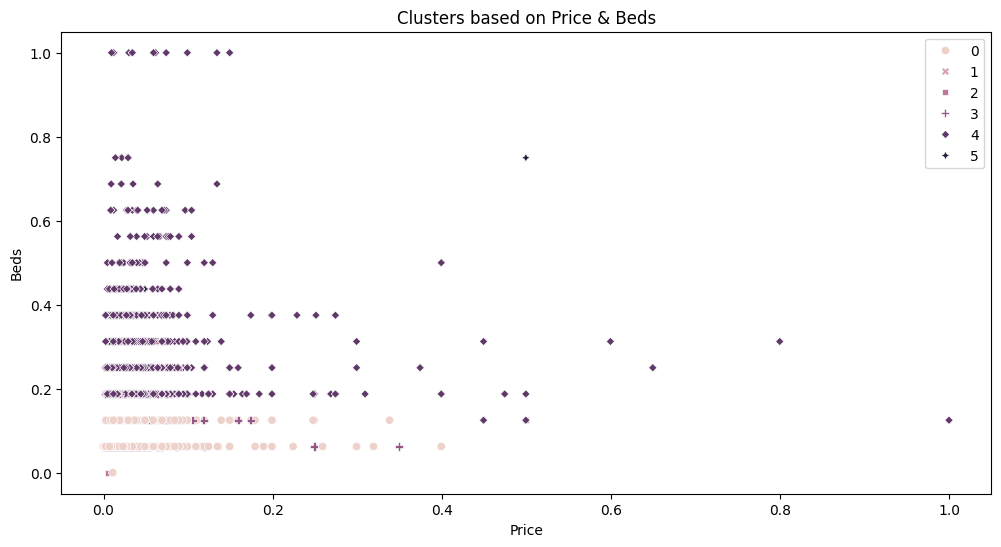

In [45]:
from sklearn.cluster import KMeans

features_for_clustering = ["Beds", "Number Of Reviews", "Review Scores Rating","Price"]
X = df[features_for_clustering].values

model = KMeans(n_clusters=6, random_state=0, n_init=10)
df['g_hat'] = model.fit_predict(X)

centers = model.cluster_centers_

min_x1, max_x1 = df["Beds"].min(), df["Beds"].max()
min_x2, max_x2 = df["Review Scores Rating"].min(), df["Review Scores Rating"].max()
min_x3, max_x3 = df["Number Of Reviews"].min(), df["Number Of Reviews"].max()

centroid_x_1 = centers[:, 0] * (max_x1 - min_x1) + min_x1
centroid_x_2 = centers[:, 1] * (max_x2 - min_x2) + min_x2
centroid_x_3 = centers[:, 1] * (max_x3 - min_x3) + min_x3

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Review Scores Rating', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Review Scores Rating")
plt.xlabel("Price")
plt.ylabel("Review Scores Rating")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Number Of Reviews', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Number Of Reviews")
plt.xlabel("Price")
plt.ylabel("Number Of Reviews")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Beds', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Beds")
plt.xlabel("Price")
plt.ylabel("Beds")
plt.legend()
plt.show()


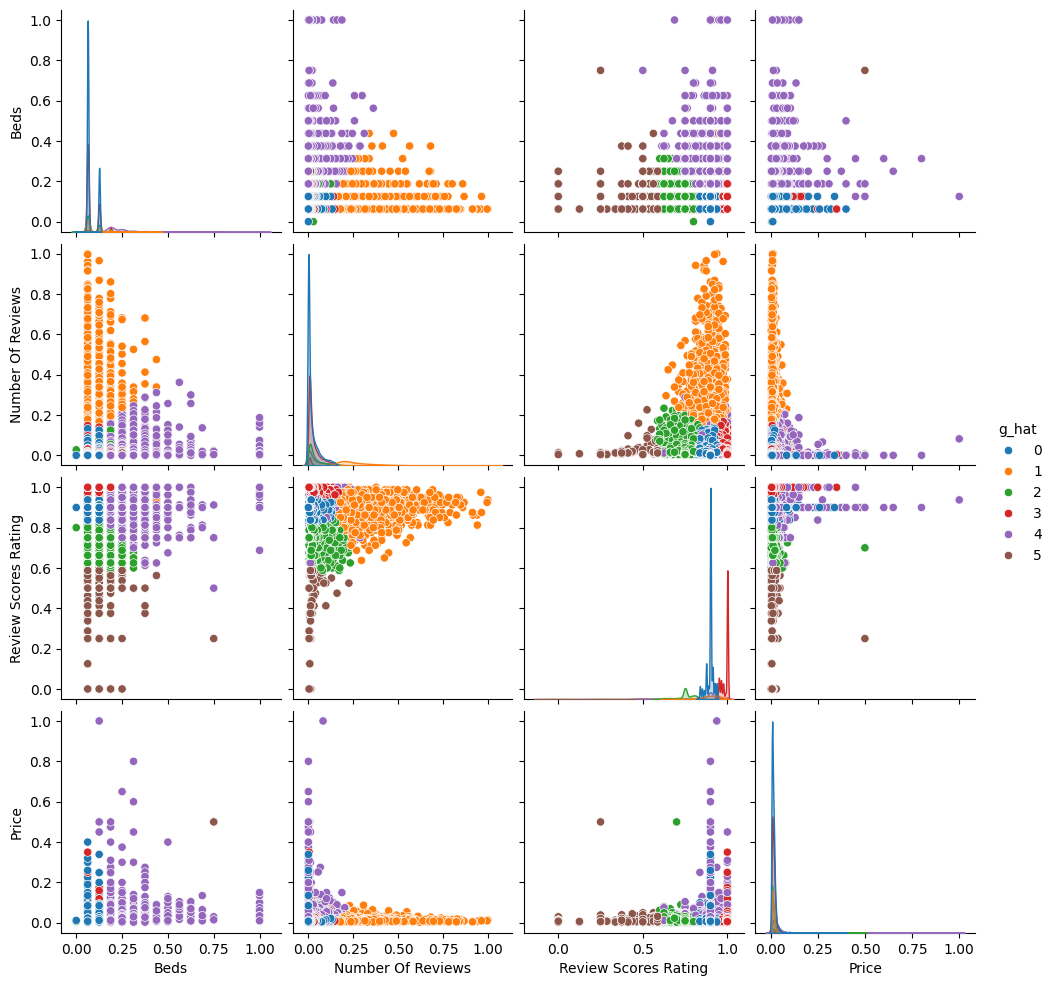

In [44]:
sns.pairplot(df, vars=["Beds", "Number Of Reviews", "Review Scores Rating","Price"], hue="g_hat", palette="tab10")

In [50]:
cluster_price_stats = df.groupby("g_hat")["Price"].describe()

print(cluster_price_stats)

         count      mean       std       min       25%       50%       75%  \
g_hat                                                                        
0      13795.0  0.013996  0.015153  0.000000  0.007007  0.011011  0.017017   
1       2373.0  0.012654  0.008013  0.001201  0.007508  0.011011  0.016016   
2       2970.0  0.012019  0.012057  0.001001  0.006006  0.009510  0.015015   
3       8281.0  0.014306  0.010828  0.000000  0.007608  0.012012  0.018519   
4       2525.0  0.033335  0.048465  0.001702  0.014014  0.023824  0.036537   
5        449.0  0.012087  0.024583  0.001502  0.005005  0.008008  0.014014   

            max  
g_hat            
0      0.399399  
1      0.086587  
2      0.499499  
3      0.349349  
4      1.000000  
5      0.499499  


It looks like cluster 4 has the highest avg rent prices and the other five clusters are more or less the same price wise. If we think about that, this makes sense because it probably clustered all high prices together.

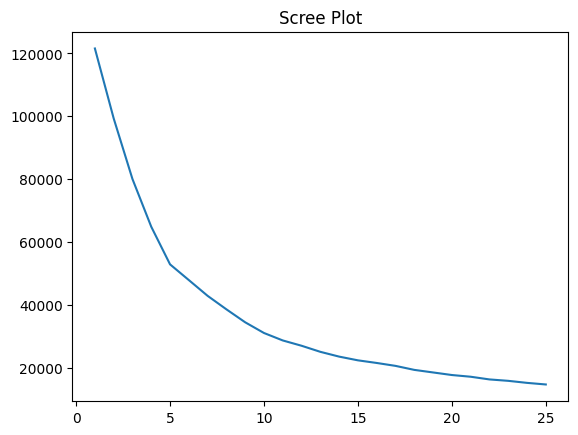

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_bar = 25
SSE = []
for k in range(1, k_bar + 1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X_scaled)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

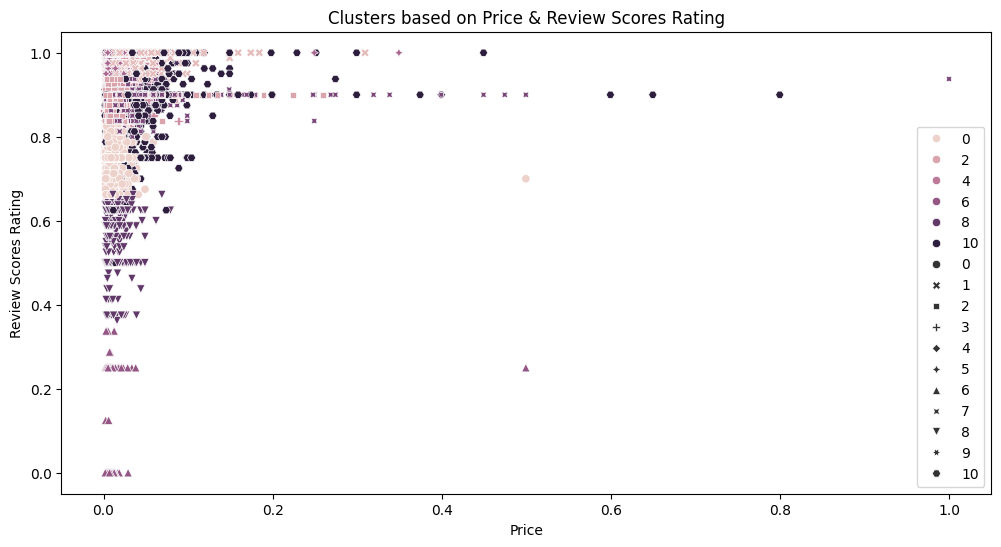

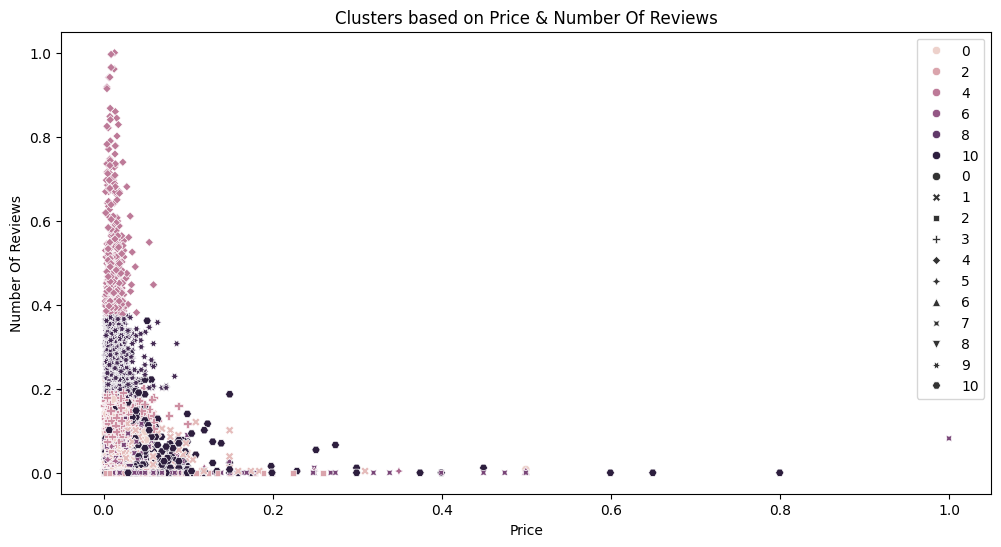

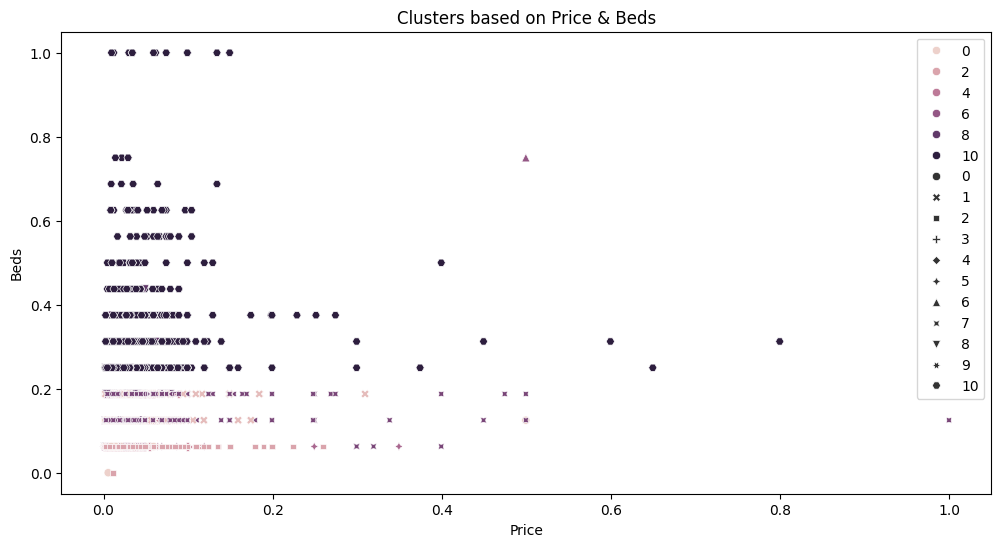

In [53]:
features_for_clustering = ["Beds", "Number Of Reviews", "Review Scores Rating","Price"]
X = df[features_for_clustering].values

model = KMeans(n_clusters=11, random_state=0, n_init=10)
df['g_hat'] = model.fit_predict(X)

centers = model.cluster_centers_

min_x1, max_x1 = df["Beds"].min(), df["Beds"].max()
min_x2, max_x2 = df["Review Scores Rating"].min(), df["Review Scores Rating"].max()
min_x3, max_x3 = df["Number Of Reviews"].min(), df["Number Of Reviews"].max()

centroid_x_1 = centers[:, 0] * (max_x1 - min_x1) + min_x1
centroid_x_2 = centers[:, 1] * (max_x2 - min_x2) + min_x2
centroid_x_3 = centers[:, 1] * (max_x3 - min_x3) + min_x3

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Review Scores Rating', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Review Scores Rating")
plt.xlabel("Price")
plt.ylabel("Review Scores Rating")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Number Of Reviews', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Number Of Reviews")
plt.xlabel("Price")
plt.ylabel("Number Of Reviews")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price', y='Beds', hue='g_hat', style='g_hat')
plt.title("Clusters based on Price & Beds")
plt.xlabel("Price")
plt.ylabel("Beds")
plt.legend()
plt.show()


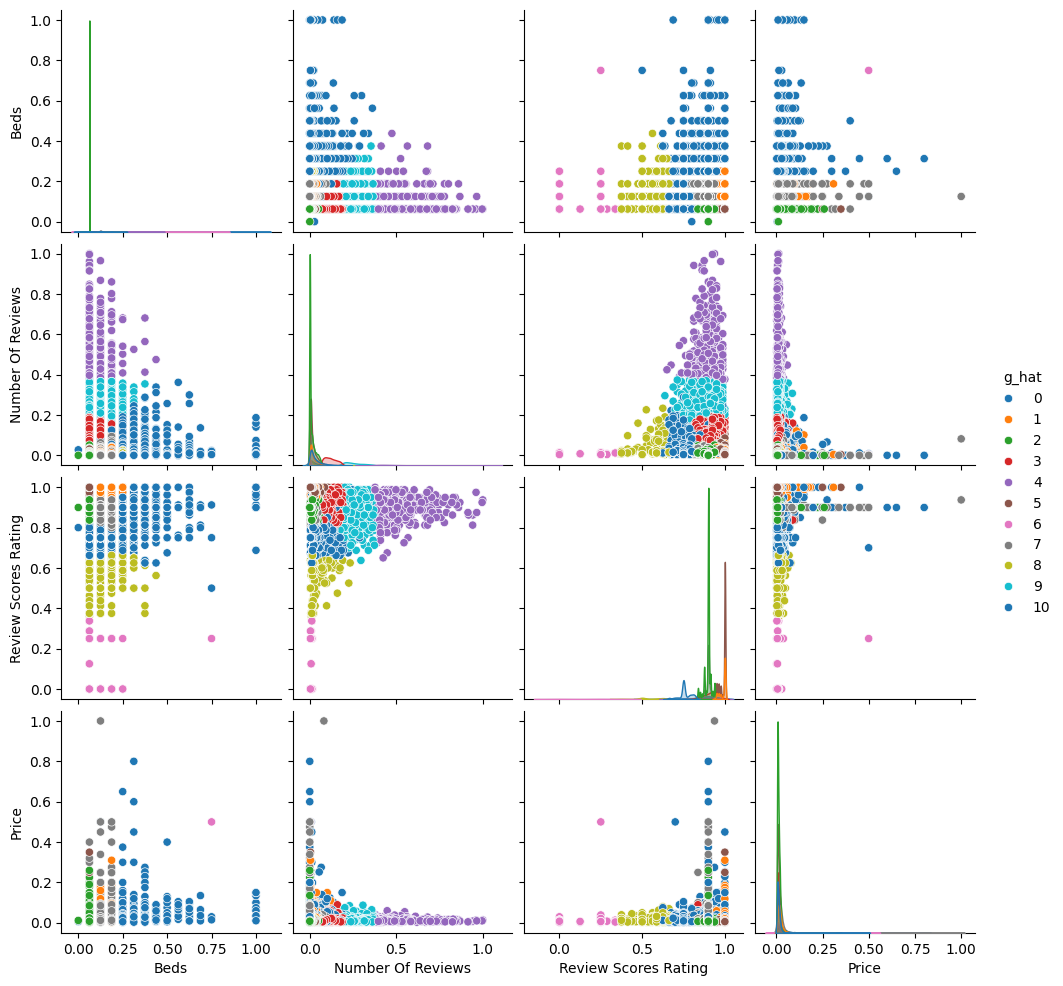

In [54]:
sns.pairplot(df, vars=["Beds", "Number Of Reviews", "Review Scores Rating","Price"], hue="g_hat", palette="tab10")

In [55]:
cluster_price_stats = df.groupby("g_hat")["Price"].describe()

print(cluster_price_stats)

        count      mean       std       min       25%       50%       75%  \
g_hat                                                                       
0      2677.0  0.011779  0.012081  0.001001  0.006006  0.009409  0.015015   
1      2258.0  0.021327  0.016975  0.001602  0.012012  0.017668  0.024024   
2      9462.0  0.012120  0.011524  0.000000  0.006507  0.009009  0.014815   
3      2964.0  0.013104  0.008076  0.001201  0.007508  0.011512  0.016517   
4       440.0  0.011640  0.006953  0.002002  0.006982  0.009510  0.015516   
5      5371.0  0.012304  0.009240  0.000000  0.006907  0.010911  0.016116   
6        93.0  0.014482  0.051287  0.002002  0.005005  0.007007  0.012012   
7      3951.0  0.023451  0.034009  0.001502  0.011512  0.017017  0.024024   
8       573.0  0.012245  0.010074  0.001502  0.005506  0.009009  0.016016   
9      1493.0  0.013336  0.009033  0.001702  0.007808  0.011011  0.016517   
10     1111.0  0.037366  0.049980  0.001702  0.016517  0.026527  0.043493   

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?